# Superstore Analysis

## Intro
A deep dive into the Superstore dataset!

## Goal
Management wants to find ways to increase overall profit.

## Data
US Superstore data (2014-2017)

https://www.kaggle.com/datasets/juhi1994/superstore

## Questions to Answer

1. What category/sub-category brings in the most revenue?
2. Which sub-categories have negative profit margins?
3. What caused an increase in sales in 2017?
4. Which customers consist of our top category/sub-category?

## Dataset Info

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

path = os.getcwd()
df = pd.read_csv(path + '/Formatted - Superstore.csv',parse_dates=['Order Date','Ship Date'],infer_datetime_format=True)

In [2]:
df.shape

(9994, 23)

In [3]:
pd.set_option('display.max_columns', 23)

In [4]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int64
Month                     int64
DOW                      object
dtype: object

In [5]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [6]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
DOW              0
dtype: int64

In [7]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [9]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [10]:
df['Product Name'].nunique()

1850

## 1. Revenue

##### By Year & Category

In [11]:
df_year_cat = df.groupby(['Year','Category']).sum().drop(columns=['Month','Discount'])
df_year_cat['Year-Quantity'] = df_year_cat.groupby(level=0)['Quantity'].transform(np.sum)
df_year_cat['Year-Profit'] = df_year_cat.groupby(level=0)['Profit'].transform(np.sum)
df_year_cat.insert(3,'PctQtyOfYear',(df_year_cat['Quantity']/df_year_cat['Year-Quantity']))
df_year_cat.insert(4,'PctProfitOfYear',(df_year_cat['Profit']/df_year_cat['Year-Profit']))

In [12]:
df_year_cat

Sales  Quantity      Profit  PctQtyOfYear  \
Year Category                                                           
2014 Furniture        157192.8531      1623   5457.7255      0.214088   
     Office Supplies  151776.4120      4569  22593.4161      0.602691   
     Technology       175278.2330      1389  21492.8325      0.183221   
2015 Furniture        170518.2370      1775   3015.2029      0.222459   
     Office Supplies  137233.4630      4715  25099.5338      0.590926   
     Technology       162780.8090      1489  33503.8670      0.186615   
2016 Furniture        198901.4360      2193   6959.9531      0.222934   
     Office Supplies  183939.9820      5946  35061.2292      0.604453   
     Technology       226364.1800      1698  39773.9920      0.172614   
2017 Furniture        215387.2692      2437   3018.3913      0.195335   
     Office Supplies  246097.1750      7676  39736.6217      0.615261   
     Technology       271730.8110      2363  50684.2566      0.189404   

                      PctProfitOfYear  Year-Quantity  Year-Profit  
Year Category                                                      
2014 Furniture               0.110159           7581   49543.9741  
     Office Supplies         0.456028           7581   49543.9741  
     Technology              0.433813           7581   49543.9741  
2015 Furniture               0.048933           7979   61618.6037  
     Office Supplies         0.407337           7979   61618.6037  
     Technology              0.543730           7979   61618.6037  
2016 Furniture               0.085090           9837   81795.1743  
     Office Supplies         0.428647           9837   81795.1743  
     Technology              0.486263           9837   81795.1743  
2017 Furniture               0.032303          12476   93439.2696  
     Office Supplies         0.425267          12476   93439.2696  
     Technology              0.542430          12476   93439.2696

In [13]:
df_year_cat.loc[2014]['Sales']

Category
Furniture          157192.8531
Office Supplies    151776.4120
Technology         175278.2330
Name: Sales, dtype: float64

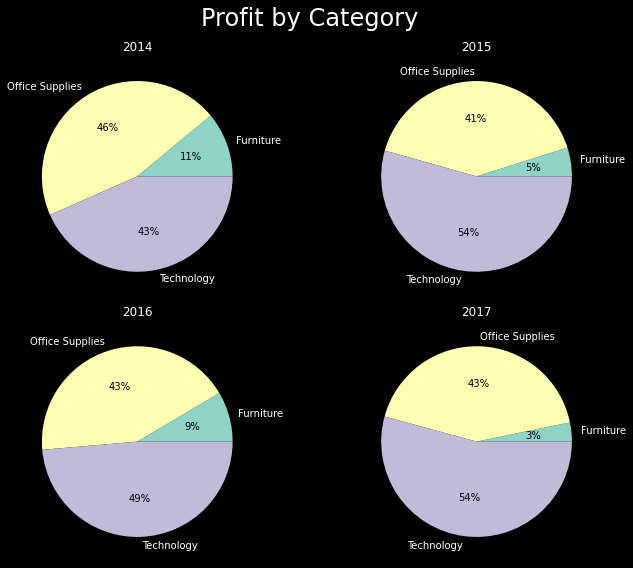

In [14]:
plt.style.use('dark_background')
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(2, 2, figsize=(10,8))

list_of_axes = [ax1,ax2,ax3,ax4]
year = [2014,2015,2016,2017]
category = ['Furniture','Office Supplies','Technology']
i = 0

for ax in list_of_axes:
    df_year_cat_pie = df_year_cat.loc[year[i]]
    x = df_year_cat_pie['Profit']
    myexplode = [0, 0.2, 0]
    _, _, autotexts = ax.pie(x,labels=category,autopct='%1.0f%%')
    for autotext in autotexts:
        autotext.set_color('black')
    ax.title.set_text(year[i])
    i = i+1

fig.suptitle('Profit by Category', fontsize=24)

fig.tight_layout()

In [15]:
df[df['Category']=='Technology']['Sub-Category'].value_counts()

Phones         889
Accessories    775
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64

Technology has grown to be our most profitable catgory. It is 54% of our total revenue in 2017. The Technology category consists of "Phones", "Accessories", "Machines", and "Copiers".

##### By Year & Sub-Category

In [16]:
df_year_subcat = df.groupby(['Year','Sub-Category']).sum().drop(columns=['Month','Discount'])
df_year_subcat['Year-Profit'] = df_year_subcat.groupby(level=0)['Profit'].transform(np.sum)
df_year_subcat.insert(3,'PctProfitOfYear',(df_year_subcat['Profit']/df_year_subcat['Year-Profit']))

In [17]:
df_year_subcat.loc[2017].sort_values(by='PctProfitOfYear',ascending=False)

Sales  Quantity      Profit  PctProfitOfYear  Year-Profit
Sub-Category                                                                 
Copiers        62899.3880        73  25031.7902         0.267894   93439.2696
Accessories    59946.2320      1079  15672.3570         0.167728   93439.2696
Phones        105340.5160      1090  12849.3250         0.137515   93439.2696
Paper          27694.7180      1702  12040.8434         0.128863   93439.2696
Appliances     42926.9320       654   7865.2683         0.084175   93439.2696
Binders        72788.0450      2067   7669.7418         0.082083   93439.2696
Chairs         95554.3530       674   7643.5493         0.081802   93439.2696
Storage        69677.6180      1022   7402.8007         0.079226   93439.2696
Furnishings    28915.0940      1097   4099.1628         0.043870   93439.2696
Art             8863.0680      1101   2221.9631         0.023780   93439.2696
Labels          3861.2160       448   1744.6093         0.018671   93439.2696
Envelopes       3378.5740       241   1441.7590         0.015430   93439.2696
Fasteners        857.5940       249    304.9489         0.003264   93439.2696
Bookcases      30024.2797       276   -583.6261        -0.006246   93439.2696
Supplies       16049.4100       192   -955.3128        -0.010224   93439.2696
Machines       43544.6750       121  -2869.2156        -0.030707   93439.2696
Tables         60893.5425       390  -8140.6947        -0.087123   93439.2696

In 2017, the top three sub-categories were from the technology category. Notably, "Paper", which is from the Office Supplies category, brought in 12% of sales.

## 2. Negative Profit Margins

In [18]:
df_year_subcat.loc[2017].sort_values(by='PctProfitOfYear')

Sales  Quantity      Profit  PctProfitOfYear  Year-Profit
Sub-Category                                                                 
Tables         60893.5425       390  -8140.6947        -0.087123   93439.2696
Machines       43544.6750       121  -2869.2156        -0.030707   93439.2696
Supplies       16049.4100       192   -955.3128        -0.010224   93439.2696
Bookcases      30024.2797       276   -583.6261        -0.006246   93439.2696
Fasteners        857.5940       249    304.9489         0.003264   93439.2696
Envelopes       3378.5740       241   1441.7590         0.015430   93439.2696
Labels          3861.2160       448   1744.6093         0.018671   93439.2696
Art             8863.0680      1101   2221.9631         0.023780   93439.2696
Furnishings    28915.0940      1097   4099.1628         0.043870   93439.2696
Storage        69677.6180      1022   7402.8007         0.079226   93439.2696
Chairs         95554.3530       674   7643.5493         0.081802   93439.2696
Binders        72788.0450      2067   7669.7418         0.082083   93439.2696
Appliances     42926.9320       654   7865.2683         0.084175   93439.2696
Paper          27694.7180      1702  12040.8434         0.128863   93439.2696
Phones        105340.5160      1090  12849.3250         0.137515   93439.2696
Accessories    59946.2320      1079  15672.3570         0.167728   93439.2696
Copiers        62899.3880        73  25031.7902         0.267894   93439.2696

"Tables", "Machines", "Supplies", and "Bookcases" brought in negative profit margins in 2017.

## 3. Increase in 2017 Sales

##### Setup

In [19]:
df_overall_sales = df.groupby(['Year','Month']).agg('sum').reset_index()
df_overall_sales['Date'] = df_overall_sales['Month'].map(str)+ '-' +df_overall_sales['Year'].map(str)
df_overall_sales['Date'] = pd.to_datetime(df_overall_sales['Date'], format='%m-%Y')#.dt.strftime('%m-%Y')
df_overall_sales.head(10)

Year  Month       Sales  Quantity  Discount     Profit       Date
0  2014      1  14236.8950       284     10.00  2450.1907 2014-01-01
1  2014      2   4519.8920       159      8.10   862.3084 2014-02-01
2  2014      3  55691.0090       585     26.30   498.7299 2014-03-01
3  2014      4  28295.3450       536     14.85  3488.8352 2014-04-01
4  2014      5  23648.2870       466     18.95  2738.7096 2014-05-01
5  2014      6  34595.1276       521     23.22  4976.5244 2014-06-01
6  2014      7  33946.3930       550     24.55  -841.4826 2014-07-01
7  2014      8  27909.4685       609     20.05  5318.1050 2014-08-01
8  2014      9  81777.3508      1000     42.87  8328.0994 2014-09-01
9  2014     10  31453.3930       573     25.45  3448.2573 2014-10-01

##### Year to Year data

In [20]:
df_year_sum = df.groupby('Year').sum().drop(columns=['Month','Discount']).round(2)
df_year_sum

Sales  Quantity    Profit
Year                               
2014  484247.50      7581  49543.97
2015  470532.51      7979  61618.60
2016  609205.60      9837  81795.17
2017  733215.26     12476  93439.27

In [21]:
df_tot_sales_inc = df_year_sum.loc[2017] - df_year_sum.loc[2014]
df_tot_sales_inc = df_tot_sales_inc['Sales']
df_tot_sales_inc

248967.76

##### Overall Sales Over Time

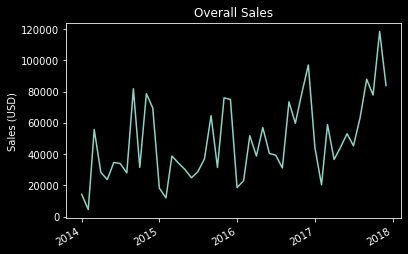

In [22]:
fig, ax = plt.subplots()

plt.plot(df_overall_sales['Date'], df_overall_sales['Sales'])
plt.title('Overall Sales')
plt.ylabel('Sales (USD)')
fig.autofmt_xdate()

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1,month=1,day=1))

In [23]:
df_sales = df_year_subcat.reset_index()
df_sales = pd.crosstab(df_sales['Year'],df_sales['Sub-Category'],values=df_sales['Sales'],
                       aggfunc='sum',margins=False).round(2)
df_sales.loc['Increase'] = df_sales.loc[2017] - df_sales.loc[2014]
df_sales.loc['PctIncrease'] = ((df_sales.loc[2017] - df_sales.loc[2014])/df_sales.loc[2017]).round(2)
df_sales.loc['OverallSalesPctInc'] = (df_sales.loc['Increase']/df_tot_sales_inc).round(2)

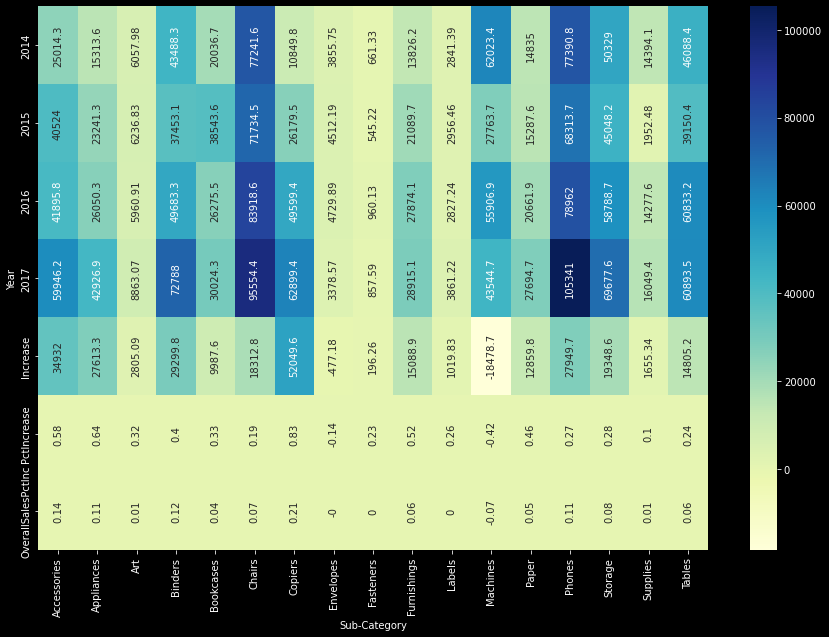

In [24]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))  
heatmap = sns.heatmap(df_sales,cmap="YlGnBu",annot=True,cbar=True,ax=ax,annot_kws={'rotation': 90},fmt='g')


"Copiers" drove the increase in sales from 2014 to 2017. It was both the highest percentage increase (83%) and amount increase (~$52,049). From our previous analysis, we also know that it has the highest profit margins as well. It attributed to 21% of the overall sales increase.

"Accessories" and "Applicances" has had notable increases in sales as well. "Accessories" increased by 58% or ~\\$34,932, and "Appliances" increased by 64% or
~\\$27,613.

The sub-categories of "Copiers", "Accessories", "Binders", "Phones", and "Appliances" consisted of 69% of the total increase in sales since 2014 (~\\$248,967).

## 4. Customers of Technology

##### Category

In [25]:
tech = (df['Category']=='Technology')
df_tech = df[tech]
df_tech.shape

(1847, 23)

In [26]:
df_tech['Customer ID'].nunique()

687

In [27]:
#multiple orders from same customers
mult_order = df_tech['Customer ID']
df_tech[mult_order.isin(mult_order[mult_order.duplicated()])].sort_values(by='Customer Name')

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
1985  CA-2014-157644 2014-12-31 2015-01-01     First Class    AH-10030   
4056  CA-2015-130113 2015-12-27 2015-12-31  Standard Class    AH-10030   
6697  CA-2017-113481 2017-01-02 2017-01-04     First Class    AS-10045   
8098  CA-2017-162691 2017-08-01 2017-08-07  Standard Class    AS-10045   
9186  CA-2017-107174 2017-11-06 2017-11-13  Standard Class    AB-10060   
...              ...        ...        ...             ...         ...   
1302  CA-2014-151995 2014-10-13 2014-10-15     First Class    ZC-21910   
2311  CA-2015-133452 2015-04-13 2015-04-19  Standard Class    ZC-21910   
5069  CA-2016-152471 2016-07-08 2016-07-08        Same Day    ZD-21925   
4449  CA-2016-167682 2016-04-03 2016-04-09  Standard Class    ZD-21925   
959   CA-2014-143336 2014-08-27 2014-09-01    Second Class    ZD-21925   

           Customer Name      Segment        Country           City State  \
1985       Aaron Hawkins    Corporate  United States  New York City    NY   
4056       Aaron Hawkins    Corporate  United States  San Francisco    CA   
6697      Aaron Smayling    Corporate  United States   Jacksonville    NC   
8098      Aaron Smayling    Corporate  United States         Austin    TX   
9186     Adam Bellavance  Home Office  United States        Seattle    WA   
...                  ...          ...            ...            ...   ...   
1302    Zuschuss Carroll     Consumer  United States        Edmonds    WA   
2311    Zuschuss Carroll     Consumer  United States         Pomona    CA   
5069  Zuschuss Donatelli     Consumer  United States   Jacksonville    FL   
4449  Zuschuss Donatelli     Consumer  United States       Richmond    IN   
959   Zuschuss Donatelli     Consumer  United States  San Francisco    CA   

     Postal Code   Region       Product ID    Category Sub-Category  \
1985       10035     East  TEC-AC-10003614  Technology  Accessories   
4056       94122     West  TEC-PH-10003505  Technology       Phones   
6697       28540    South  TEC-MA-10002178  Technology     Machines   
8098       78745  Central  TEC-MA-10000488  Technology     Machines   
9186       98105     West  TEC-AC-10001465  Technology  Accessories   
...          ...      ...              ...         ...          ...   
1302       98026     West  TEC-AC-10001101  Technology  Accessories   
2311       91767     West  TEC-AC-10002800  Technology  Accessories   
5069       32216    South  TEC-PH-10002824  Technology       Phones   
4449       47374  Central  TEC-PH-10000673  Technology       Phones   
959        94109     West  TEC-PH-10001949  Technology       Phones   

                                           Product Name     Sales  Quantity  \
1985  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...    34.770         3   
4056                               Geemarc AmpliPOWER60   668.160         9   
6697  Cisco CP-7937G Unified IP Conference Station P...   695.700         2   
8098                        Bady BDG101FRU Card Printer  1439.982         3   
9186               SanDisk Cruzer 64 GB USB Flash Drive   108.960         3   
...                                                 ...       ...       ...   
1302      Sony 16GB Class 10 Micro SDHC R40 Memory Card    25.780         2   
2311           Plantronics Audio 478 Stereo USB Headset   199.960         4   
5069           Jabra SPEAK 410 Multidevice Speakerphone   823.960         5   
4449     Plantronics Voyager Pro HD - Bluetooth Headset   259.960         4   
959                             Cisco SPA 501G IP Phone   213.480         3   

      Discount    Profit  Year  Month        DOW  
1985       0.0   11.4741  2014     12  Wednesday  
4056       0.2   75.1680  2015     12     Sunday  
6697       0.5  -27.8280  2017      1     Monday  
8098       0.4 -263.9967  2017      8    Tuesday  
9186       0.0   32.6880  2017     11     Monday  
...        ...       ...   ...    ...        ...  
1302       0.0    2.5780  2014     10  

In [28]:
df_tech[mult_order.isin(mult_order[mult_order.duplicated()])].sort_values(by='Customer Name')['Customer ID'].nunique()

490

In [29]:
df_tech['Segment'].value_counts()

Consumer       951
Corporate      554
Home Office    342
Name: Segment, dtype: int64

In [30]:
df_tech['Ship Mode'].value_counts()

Standard Class    1082
Second Class       366
First Class        301
Same Day            98
Name: Ship Mode, dtype: int64

##### Sub-Category

In [31]:
copiers = (df['Sub-Category']=='Copiers')
df_copiers = df[copiers]
df_copiers.shape

(68, 23)

In [32]:
df_copiers['Customer ID'].nunique()

64

In [33]:
#multiple orders from same customers
mult_order = df_copiers['Customer ID']
df_copiers[mult_order.isin(mult_order[mult_order.duplicated()])].sort_values(by='Customer Name')

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
3680  CA-2015-105690 2015-11-21 2015-11-26    Second Class    CA-11965   
6604  CA-2016-157791 2016-12-23 2016-12-28    Second Class    CA-11965   
4742  CA-2016-143714 2016-05-23 2016-05-27  Standard Class    CC-12370   
5055  CA-2016-135265 2016-07-07 2016-07-09    Second Class    CC-12370   
3111  CA-2015-140984 2015-09-14 2015-09-18  Standard Class    CC-12685   
3398  CA-2015-109190 2015-10-23 2015-10-28  Standard Class    CC-12685   
858   CA-2014-124478 2014-08-08 2014-08-12  Standard Class    MA-17560   
3873  CA-2015-143105 2015-12-10 2015-12-10        Same Day    MA-17560   

           Customer Name      Segment        Country           City State  \
3680         Carol Adams    Corporate  United States    Port Arthur    TX   
6604         Carol Adams    Corporate  United States        Warwick    RI   
4742  Christopher Conant     Consumer  United States   Philadelphia    PA   
5055  Christopher Conant     Consumer  United States    Los Angeles    CA   
3111       Craig Carroll     Consumer  United States  New York City    NY   
3398       Craig Carroll     Consumer  United States        Lubbock    TX   
858         Matt Abelman  Home Office  United States        Trenton    MI   
3873        Matt Abelman  Home Office  United States  New York City    NY   

     Postal Code   Region       Product ID    Category Sub-Category  \
3680       77642  Central  TEC-CO-10001571  Technology      Copiers   
6604        2886     East  TEC-CO-10002095  Technology      Copiers   
4742       19120     East  TEC-CO-10004722  Technology      Copiers   
5055       90045     West  TEC-CO-10003763  Technology      Copiers   
3111       10011     East  TEC-CO-10001571  Technology      Copiers   
3398       79424  Central  TEC-CO-10001943  Technology      Copiers   
858        48183  Central  TEC-CO-10001571  Technology      Copiers   
3873       10024     East  TEC-CO-10002095  Technology      Copiers   

                                           Product Name     Sales  Quantity  \
3680                  Sharp 1540cs Digital Laser Copier   439.992         1   
6604  Hewlett Packard 610 Color Digital Copier / Pri...  1999.960         4   
4742              Canon imageCLASS 2200 Advanced Copier  8399.976         4   
5055                 Canon PC1060 Personal Laser Copier  2799.960         5   
3111                  Sharp 1540cs Digital Laser Copier   879.984         2   
3398                       Canon PC-428 Personal Copier   479.976         3   
858                   Sharp 1540cs Digital Laser Copier   549.990         1   
3873  Hewlett Packard 610 Color Digital Copier / Pri...   799.984         2   

      Discount     Profit  Year  Month       DOW  
3680       0.2   164.9970  2015     11  Saturday  
6604       0.0   899.9820  2016     12    Friday  
4742       0.4  1119.9968  2016      5    Monday  
5055       0.2   944.9865  2016      7  Thursday  
3111       0.2   329.9940  2015      9    Monday  
3398       0.2   161.9919  2015     10    Friday  
858        0.0   274.9950  2014      8    Friday  
3873       0.2   249.9950  2015     12  Thursday

In [34]:
df_copiers['Segment'].value_counts()

Consumer       35
Corporate      20
Home Office    13
Name: Segment, dtype: int64

In [35]:
df_copiers['Ship Mode'].value_counts()

Standard Class    36
Second Class      15
First Class       12
Same Day           5
Name: Ship Mode, dtype: int64

The majority of technology customers and copier buyers were consumers and most used standard shipping. We had 290 technology customer with multiple purchases. There is unfortunately not enough data to make any recommendations to target more technology customers.

## Recommendations

On the surface level, we should continue selling more of our products that sell well and have high profit margins:

* Accessories
* Phones
* Paper

However, copiers bring in the most revenue, but the quantity is not very high. It was the biggest driver in our increase in profits. Our sales team should focus more on selling more copiers to maximize profits. 

We can also start to limit inventory on our categories that bring a negative profit margin:

* Tables
* Machines
* Supplies
* Bookcases

There can be further analysis done on which products are profitable within each sub-category.